# 1. Data cleaning

### get rid of http tags, links, none-english characters, etc.

In [1]:
import pandas as pd
import numpy as np
import re
dp = r"G:\MIE1624\A1"

df_generic = pd.read_csv(dp+r"\generic_tweets.txt", sep=",", header=0)
df_airline = pd.read_csv(dp+r"\US_airline_tweets.csv", sep=",", header=0)
stop_word = set(pd.read_csv(dp+r"\stop_words.txt", sep=" ", header=None).values[:,0].tolist())

# delete all links start with "http(s)" and "www.". Also delete HTML tags, special chars and english stop words
def data_clear(aaa):
    aaa = aaa.lower()
    aaa = re.sub(r"\s"," ",aaa)
    aaa = re.sub(r"<.*?>|http[^ ]*|www\.[^ ]*|\b[\w']*[^@\w'\s]+[\w']*\b|[^@\w'\s]|'\w*\b|\d*","",aaa)  # if only wants to delete tag, then use <.*?>
    aaa = re.sub(r"[`~!#$%\^\&\*\(\)\-\+=\[\]\{\}\|\\:;<>,\.\?]","",aaa)
    aaa = re.sub(r" +"," ",aaa)
    aaa = aaa.split(" ")
    for i in range(len(aaa)):
        if aaa[i] in stop_word:
            aaa[i] = ""
    aaa = " ".join(aaa)
    aaa = re.sub(r" +"," ",aaa)
    return aaa

def get_rid_of_at_information(aaa):
    return re.sub(r"@\w*","",aaa)

df_generic["text"] = df_generic["text"].apply(get_rid_of_at_information)
df_generic["text"] = df_generic["text"].apply(data_clear)

# we keep "@" for df_airline, because we need "@" to tell us the airline name
df_airline["text"] = df_airline["text"].apply(data_clear)

df_generic.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww bummer shoulda david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting cry result scho...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived times ball managed save rest bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,body feels itchy fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving mad


# 2. Exploratory analysis 
## 2.1 determines the airline

### First, find all words that possiablly related to airline, and mannually clear it to get all us-airline names

In [2]:
# 1.find all words that possiablly related to airline, and mannually clear it
airline_dict = {}
def find_airline(aaa):
    global airline_dict
    aaa = re.findall(r"@\w+|\w*air\w*",aaa)
    for i in range(len(aaa)):
        aaa[i] = re.sub(r"@","",aaa[i])
    for i in aaa:
        if i not in airline_dict:
            airline_dict[i] = 0
        airline_dict[i] += 1
df_airline["text"].apply(find_airline)
drop_set = []
for i in airline_dict:
    if airline_dict[i] <= 3:
        drop_set.append(i)
for i in drop_set:
    airline_dict.pop(i)
airline_set = [i[0] for i in airline_dict.items()]
print(airline_set)

['usairways', 'ny_njairports', 'airport', 'aircraft', 'airfare', 'delta', 'usairsucks', 'aircanada', 'wheelchair', 'phlairport', 'airline', 'airlines', 'southwest', 'silverairways', 'love_dragonss', 'united', 'air', 'virginatlantic', 'americanairlines', 'dulles_airport', 'expedia', 'unitedairlines', 'carrieunderwood', 'spiritairlines', 'chairman', 'dfwairport', 'fair', 'chair', 'americanair', 'usairwayssucks', 'cnn', 'kylejudah', 'jetblue', 'chairs', 'fortunemagazine', 'worstairline', 'imaginedragons', 'southwestair', 'pair', 'wsj', 'airports', 'airbus', 'virginamerica', 'usairwaysfail', 'tsa', 'worstairlineever', 'airways', 'cowboycerrone', 'staralliance', 'bestairline', 'southwestairlines', 'gg', 'airplane', 'velourlive', 'airplanes', 'usair', 'ladygaga', 'repair']


### then, manually build the ariline name list from airline_set

In [3]:
dirline_final_set = set(['usairway', 'southwest', 'americanair', 'southwestair', 'usair', 'virginamerica', 'silverairways', 'jetblue',\
                    'americanairlines', 'united', 'delta', 'spiritairlines', 'southwestairlines', 'aircanada', 'unitedairlines'])

### after that, append airline name to the dataframe
### under the condition that one tweet only related to one airline
### "@" has the highest priority, if dont have "@", then find first airline name user mentioned

In [4]:
def set_airline(aaa):
    airline = re.findall(r'@usairway|@southwest|@americanair|@southwestair|@usair|@virginamerica|@silverairways|@jetblue|@americanairlines|@united|@delta|@spiritairlines|@southwestairlines|@aircanada|@unitedairlines',aaa)
    if airline:
        return re.sub(r"@","",airline[0])
    else:
        airline = re.findall(r'usairway|southwest|americanair|southwestair|usair|virginamerica|silverairways|jetblue|americanairlines|united|delta|spiritairlines|southwestairlines|aircanada|unitedairlines',aaa)
        return airline[0] if airline else None
df_airline["airline"] = df_airline["text"].apply(set_airline)
df_airline.head()

,id,sentiment,negative_reason,user,retweet_count,text,airline
0,5.703010e+17,positive,NaN,jnardino,0,@virginamerica commercials experience tacky,virginamerica
1,5.703010e+17,negative,Bad Flight,jnardino,0,@virginamerica aggressive blast obnoxious ente...,virginamerica
2,5.703010e+17,negative,Can't Tell,jnardino,0,@virginamerica big bad thing,virginamerica
3,5.703010e+17,negative,Can't Tell,jnardino,0,@virginamerica seriously pay flight seats didn...,virginamerica
4,5.703010e+17,positive,NaN,cjmcginnis,0,@virginamerica time fly vx wormâ,virginamerica


###  distribution of the US airlines of the tweets

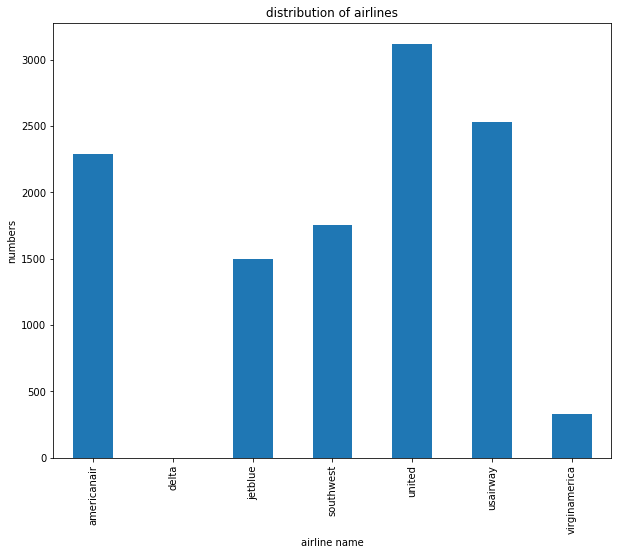

airline
americanair      2292
delta               2
jetblue          1496
southwest        1754
united           3120
usairway         2532
virginamerica     333
Name: airline, dtype: int64

In [5]:
import matplotlib.pyplot as plt
df_airline.groupby("airline")["airline"].count().plot(kind = "bar",figsize = (10,8))
plt.title("distribution of airlines")
plt.ylabel("numbers")
plt.xlabel("airline name")
plt.show()
df_airline.groupby("airline")["airline"].count()

## 2.2  few graphical figure

### wordcloud for generic tweets

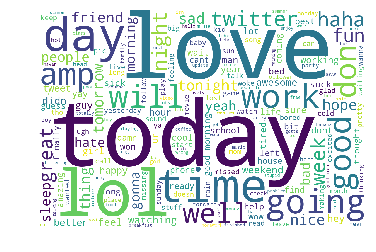

In [6]:
from wordcloud import WordCloud as wc
def get_rid_of_at(aaa):
    return re.sub(r"@","",aaa)
df_generic["text"] = df_generic["text"].apply(get_rid_of_at)

# show wordsloud
df_generic["text"].to_csv(path = r"G:\MIE1624\A1\wordcloud_generic.csv", sep = ' ',header = False, index = False)
file = open(r"G:\MIE1624\A1\wordcloud_generic.csv","r").read()
word_cloud = wc(background_color="white",width=1500, height=1000, margin=2).generate(file)
#word_cloud.to_file(r"G:\MIE1624\A1\wordcloud_generic.jpg")
plt.figure()
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

### positive and negative distrbution for generic tweets

class
0    100000
4    100000
Name: class, dtype: int64


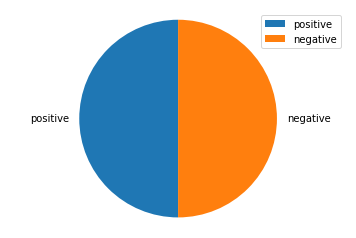

In [7]:
# show how many positive and negative
print(df_generic.groupby("class")["class"].count())
labels = ["positive","negative"]
plt.figure()
plt.pie(df_generic.groupby("class")["class"].count().values,labels = labels, startangle = 90)
plt.axis("equal")
plt.legend()
plt.show()
#  the counting show it's generic tweets set is a balance set

### wordcloud for ariline tweets

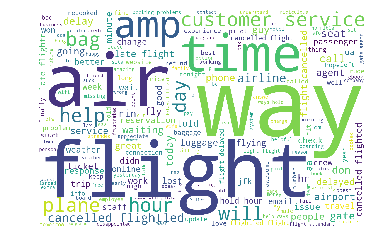

In [8]:
tmp = r'southwest|americanair|southwestair|usair|virginamerica|silverairways|jetblue|bestairline|americanairlines|united|delta|spiritairlines|southwestairlines|aircanada|unitedairlines'
def get_rid_of_airline_name(aaa):
    return re.sub(tmp,"",aaa)
for_wordcloud = df_airline["text"].apply(get_rid_of_airline_name)
for_wordcloud.to_csv(path = r"G:\MIE1624\A1\wordcloud_airline.csv", sep = ' ',header = False, index = False) 
file = open(r"G:\MIE1624\A1\wordcloud_airline.csv","r").read()
word_cloud = wc(background_color="white",width=1500, height=1000, margin=2).generate(file)
#word_cloud.to_file(r"G:\MIE1624\A1\wordcloud_airline.jpg")
plt.figure()
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
# it show most

### positive and negative distrbution for airline tweets

sentiment
negative    9178
positive    2363
Name: sentiment, dtype: int64


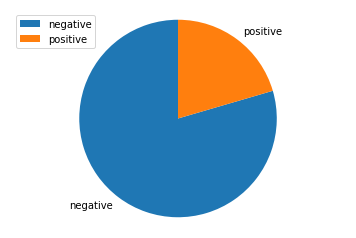

In [9]:
# show how many positive and negative
print(df_airline.groupby("sentiment")["sentiment"].count())
labels = ["negative","positive"]
plt.figure()
plt.pie(df_airline.groupby("sentiment")["sentiment"].count().values,labels = labels, startangle = 90)
plt.axis("equal")
plt.legend()
plt.show()
#  the counting show original generic tweets set is a unbalance set

# 3. Model preparation

## 3.1 prepare the training data and test data

### separate original data into train data and test data randomly

In [10]:
from sklearn.model_selection import train_test_split
df_train_dataset,df_test_dataset = train_test_split(df_generic,test_size = 0.3, random_state = 1624)

### preprocess the training data
1. split sentences
2. lemmatization

In [11]:
import nltk
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

#nltk.download("wordnet")
#nltk.download("averaged_perceptron_tagger")
#nltk.download("punkt")
#nltk.download("maxnet_treebank_pos_tagger")

def get_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
def sentences_lemmatization(sentences):
    c = 0
    total_output = []
    lemmatizer = WordNetLemmatizer()
    for sentence in sentences:
        each_output = []  
        for word,tag in pos_tag(sentence):
            pos = get_pos(tag) or wordnet.NOUN
            each_output.append(lemmatizer.lemmatize(word, pos=pos))
        total_output.append(each_output)
    return total_output



# 1. split sentences
train_dataset = df_train_dataset.loc[:,["class","text"]].values
train_sentences = train_dataset[:,1].tolist()
print("total number of sentences",len(train_sentences))
for i in range(len(train_sentences)):
    train_sentences[i] = train_sentences[i].split(" ")
    index = 0
    while index < len(train_sentences[i]):
        if train_sentences[i][index] == "":
            train_sentences[i].pop(index)
        else:
            index += 1
print("split sentences done!")
            
#2. lemmatization
lemmatized_sentences = sentences_lemmatization(train_sentences)
print("lemmatization done!")

total number of sentences 140000
split sentences done!
lemmatization done!


### after here down, I use two different approach to prepare training data to find out which is better
1. word2vec with TF-IDF
2. tfidfvectorizer in sklearning

### part 1 (bonus) vectorize sentences using word2vec and TF-IDF
1. First use Word2Vec to generate word vectors
2. get total dictionary and IDF for each words
3. Compute TF-IDF score and generate sentences vectors base on word2vec results

In [12]:
# 1.First use Word2Vec to generate word vectors
from gensim.models.word2vec import Word2Vec
vectorize_model = Word2Vec(lemmatized_sentences, size=150, window=3, min_count=2, workers=4)
vectorize_model.train(lemmatized_sentences, total_examples = vectorize_model.corpus_count, epochs = 500)
print("Word2Vec done!")


# 2. get total dictionary and IDF for each words
import math
total_dict = {}
idf = {}
for sentence in lemmatized_sentences:
    tmp = set([])
    for word in sentence:
        if word not in total_dict:
            total_dict[word] = 0
            idf[word] = 0
        if word not in tmp:
            total_dict[word] += 1
            tmp.add(word)
# compute IDF
num_of_sentences = len(lemmatized_sentences)
for word in total_dict:
    idf[word] = math.log(num_of_sentences/(total_dict[word]+1))
print("IDF computation done!")
    
    
    

# 3.Compute TF-IDF score and generate sentences vectors base on word2vec results
sentences_vector_from_word2vec = np.zeros((len(lemmatized_sentences),150), dtype = np.float)
for i,sentence in enumerate(lemmatized_sentences):
    if i%10000 == 0:
        print("sentences done:",i)
    vector = np.zeros((1,150), dtype = np.float)
    if len(sentence) == 0:
        sentences_vector_from_word2vec[i] = vector
        continue
    tmp = set(sentence)
    tf = {}
    for word in tmp:
        if total_dict[word] < 2:
            continue
        tf[word] = sentence.count(word)/len(sentence)
    for word in sentence:
        if total_dict[word] < 2:
            continue
        tfidf = tf[word]*idf[word]
        vector += tfidf*vectorize_model.wv[word]
    vector = vector/len(sentence)
    sentences_vector_from_word2vec[i] = vector
print("sentences vectors generated!")

D:\Anaconda3\envs\tensorflow\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Word2Vec done!
IDF computation done!
sentences done: 0
sentences done: 10000
sentences done: 20000
sentences done: 30000
sentences done: 40000
sentences done: 50000
sentences done: 60000
sentences done: 70000
sentences done: 80000
sentences done: 90000
sentences done: 100000
sentences done: 110000
sentences done: 120000
sentences done: 130000
sentences vectors generated!


### part 2 tfidfvectorizer in sklearning
1. compute training label
2. compute tfidf vector

In [13]:
# 1. compute the label
train_label = train_dataset[:,0]/4
train_label = train_label.astype(np.int)


# 2. compute tfidf vector
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 40000)
train_sentences_without_split = [" ".join(i) for i in lemmatized_sentences]
X = vectorizer.fit_transform(train_sentences_without_split,train_label)
print("tfidf vectors generated!")

tfidf vectors generated!


### generate train label set

## 3.1 initial logistic model 

In [14]:
from sklearn.linear_model import LogisticRegression
# init model
logistic_model = LogisticRegression(penalty="l2", 
                                    dual = False,
                                    tol = 1e-6, 
                                    C = 1, 
                                    fit_intercept = True, 
                                    intercept_scaling = 1,
                                    class_weight = "balanced", 
                                    random_state = None, 
                                    solver = "sag", 
                                    max_iter = 2000, 
                                    multi_class = "ovr", 
                                    verbose = 10,
                                    warm_start = False,
                                    n_jobs = None)

# 4. Model implementation
## 4.1 model training and accuracy(using sentences vectors generated from Word2Vec)

In [15]:
print(sentences_vector_from_word2vec.shape)
print(train_label.shape)
logistic_model.fit(sentences_vector_from_word2vec, train_label)

(140000, 150)
(140000,)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 44 epochs took 14 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s finished


LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='sag', tol=1e-06, verbose=10, warm_start=False)

### test accuracy on generic tweets
1. sentences lemmatization for test sentences
2. compute test sentences vector
3. compute test accuracy

In [16]:
# 1.sentences lemmatization for test sentences
test_dataset = df_test_dataset.loc[:,["class","text"]].values
test_sentences = test_dataset[:,1].tolist()
for i in range(len(test_sentences)):
    test_sentences[i] = test_sentences[i].split(" ")
    index = 0
    while index < len(test_sentences[i]):
        if test_sentences[i][index] == "":
            test_sentences[i].pop(index)
        else:
            index += 1
test_lemmatized_sentences = sentences_lemmatization(test_sentences)
print("lemmatization done!")



# 2.compute test sentences vector
test_sentences_vector = np.zeros((len(test_lemmatized_sentences),150), dtype = np.float)
word_c = 0
for i,sentence in enumerate(test_lemmatized_sentences):
    if i%10000 == 0:
        print("sentences done:",i)
    vector = np.zeros((1,150), dtype = np.float)
    if len(sentence) == 0:
        test_sentences_vector[i] = vector
        continue
    tmp = set(sentence)
    tf = {}
    for word in tmp:
        if word not in total_dict or total_dict[word] < 2:
            continue
        tf[word] = sentence.count(word)/len(sentence)
    for word in sentence:
        if word not in total_dict or total_dict[word] < 2:
            word_c += 1
            continue
        tfidf = tf[word]*idf[word]
        vector += tfidf*vectorize_model.wv[word]
    vector = vector/len(sentence)
    test_sentences_vector[i] = vector
print("sentences vector generated!")



# 3.compute test accuracy
test_label = test_dataset[:,0]/4 # to generate binary test class lable
test_label = test_label.astype(np.int)
print("test accuracy on test generic tweets:")
logistic_model.score(test_sentences_vector,test_label)

lemmatization done!
sentences done: 0
sentences done: 10000
sentences done: 20000
sentences done: 30000
sentences done: 40000
sentences done: 50000
sentences vector generated!
test accuracy on test generic tweets:


0.6833666666666667

## 4.2 model training and accuracy(using tfidf vectors)
1. model init
2. model learning 
3. transform test sentences to tfidf vectors
4. compute test accuracy

In [17]:
# 1.init model
tfidf_logistic_model = LogisticRegression(penalty="l2", 
                                    dual = False,
                                    tol = 1e-6, 
                                    C = 1, 
                                    fit_intercept = True, 
                                    intercept_scaling = 1,
                                    class_weight = "balanced", 
                                    random_state = None, 
                                    solver = "sag", 
                                    max_iter = 2000, 
                                    multi_class = "ovr", 
                                    verbose = 10, 
                                    warm_start = False, 
                                    n_jobs = None)


# 2. model learning
tfidf_logistic_model.fit(X, train_label)
print("logistic training complete!")



# 3. transform test sentences to tfidf vectors
test_sentences_without_split = [" ".join(i) for i in test_lemmatized_sentences]
test_sentences_vector_for_tfidf = vectorizer.transform(test_sentences_without_split)
print("test sentences tfidf vectors generated!")



# 4. compute test accuracy
print("test accuracy on test generic tweets:")
tfidf_logistic_model.score(test_sentences_vector_for_tfidf,test_label)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 32 epochs took 2 seconds
logistic training complete!


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished


test sentences tfidf vectors generated!
test accuracy on test generic tweets:


0.7393666666666666

From above, test accuracy of word2vec is roughly 0.681, while test accuracy of tfidf vectorize is roughly 0.740. We can find out the tfidf vectorize is better. So for the next part I will keep using tfidf vectorize method

### 4.3 prediction on us_airline data
1. split and lemmatization
2. transform airline tweets to tfidf vectors
3. generate airline test label
4. compute airline test accuracy

In [23]:
# 1. split and lemmatization
def class_transform(aaa):
    return 0 if aaa == "negative" else 1
df_airline["text"] = df_airline["text"].apply(get_rid_of_at_information)
airline_test_dataset = df_airline.loc[:,["sentiment","text"]]
airline_test_dataset["sentiment"] = airline_test_dataset["sentiment"].apply(class_transform)
airline_test_dataset = airline_test_dataset.values
airline_test_sentences = airline_test_dataset[:,1].tolist()
for i in range(len(airline_test_sentences)):
    airline_test_sentences[i] = airline_test_sentences[i].split(" ")
    index = 0
    while index < len(airline_test_sentences[i]):
        if airline_test_sentences[i][index] == "":
            airline_test_sentences[i].pop(index)
        else:
            index += 1
airline_test_lemmatized_sentences = sentences_lemmatization(airline_test_sentences)
print("split and lemmatization done!")



# 2. transform airline tweets to tfidf vectors
airline_test_sentences_without_split = [" ".join(i) for i in airline_test_lemmatized_sentences]
airline_test_sentences_vector_for_tfidf = vectorizer.transform(airline_test_sentences_without_split)
print("test sentences tfidf vectors generated!")



# 3. generate airline test label
airline_test_class_dataset = airline_test_dataset[:,0]
airline_test_class_dataset = airline_test_class_dataset.astype(np.int)
print("airline test label generated!")


# 4. compute airline test accuracy
print("airline test accuracy on test generic tweets:")
tfidf_logistic_model.score(airline_test_sentences_vector_for_tfidf,airline_test_class_dataset)

split and lemmatization done!
test sentences tfidf vectors generated!
airline test label generated!
airline test accuracy on test generic tweets:


0.7299194177280999

# multi-class prediction for negative reasons

### 4.4 Split the negative US airline tweets into training set and test set

In [24]:
df_airline.head()

,id,sentiment,negative_reason,user,retweet_count,text,airline
0,5.703010e+17,positive,NaN,jnardino,0,commercials experience tacky,virginamerica
1,5.703010e+17,negative,Bad Flight,jnardino,0,aggressive blast obnoxious entertainment gues...,virginamerica
2,5.703010e+17,negative,Can't Tell,jnardino,0,big bad thing,virginamerica
3,5.703010e+17,negative,Can't Tell,jnardino,0,seriously pay flight seats didn playing bad t...,virginamerica
4,5.703010e+17,positive,NaN,cjmcginnis,0,time fly vx wormâ,virginamerica


In [25]:
df_airline_negative = df_airline.loc[df_airline["sentiment"] == "negative"]
df_airline_negative.head()

,id,sentiment,negative_reason,user,retweet_count,text,airline
1,5.703010e+17,negative,Bad Flight,jnardino,0,aggressive blast obnoxious entertainment gues...,virginamerica
2,5.703010e+17,negative,Can't Tell,jnardino,0,big bad thing,virginamerica
3,5.703010e+17,negative,Can't Tell,jnardino,0,seriously pay flight seats didn playing bad t...,virginamerica
11,5.702820e+17,negative,Late Flight,smartwatermelon,0,schedule mia,virginamerica
13,5.702770e+17,negative,Bad Flight,heatherovieda,0,flew nyc sfo week couldn fully sit seat large...,virginamerica


In [26]:
df_airline_negative.groupby("negative_reason")["negative_reason"].count()

negative_reason
Bad Flight                      580
Can't Tell                     1190
Cancelled Flight                847
Customer Service Issue         2910
Damaged Luggage                  74
Flight Attendant Complaints     481
Flight Booking Problems         529
Late Flight                    1665
Lost Luggage                    724
longlines                       178
Name: negative_reason, dtype: int64

### 4.5 data processing using tfidfvectorize to get training data (the same as previous)
1. split total data into training data and test data
2. lemmatization
3. generate train label
4. generate tfidf vectors

In [27]:
# 1. split total data into training data and test data
df_airline_train_dataset,df_airline_test_dataset = train_test_split(df_airline_negative,test_size = 0.3, random_state = 1624)
print("training-test split done!")



# 2. lemmatization
train_dataset = df_airline_train_dataset.loc[:,["negative_reason","text"]].values
train_sentences = train_dataset[:,1].tolist()
print("total number of sentences:",len(train_sentences))
for i in range(len(train_sentences)):
    train_sentences[i] = train_sentences[i].split(" ")
    index = 0
    while index < len(train_sentences[i]):
        if train_sentences[i][index] == "":
            train_sentences[i].pop(index)
        else:
            index += 1
lemmatized_sentences = sentences_lemmatization(train_sentences)
print("lemmatization done!")




# 3. generate train label
negative_reason = {"Bad Flight":0,"Can't Tell":1 ,"Cancelled Flight":2 ,"Customer Service Issue":3 ,"Damaged Luggage":4,\
                   "Flight Attendant Complaints":5 ,"Flight Booking Problems":6, "Late Flight":7, "Lost Luggage":8, "longlines":9}
train_label = np.zeros((len(lemmatized_sentences)),dtype = np.int)
for i in range(len(lemmatized_sentences)):
    train_label[i] = negative_reason[train_dataset[i,0]]
print("train label generated!")



# 4. generate tfidf vectors
vectorizer = TfidfVectorizer()
train_sentences_without_split = [" ".join(i) for i in lemmatized_sentences]
X = vectorizer.fit_transform(train_sentences_without_split,train_label)
print("tfidf vectors generated!")

training-test split done!
total number of sentences: 6424
lemmatization done!
train label generated!
tfidf vectors generated!


### 4.6 training

In [28]:
multi_logistic_model = LogisticRegression(penalty="l2",
                                    dual = False,
                                    tol = 1e-6, 
                                    C = 0.5, 
                                    fit_intercept = True,
                                    intercept_scaling = 1,
                                    class_weight = "balanced", 
                                    random_state = None, 
                                    solver = "sag", 
                                    max_iter = 2000,
                                    multi_class = "multinomial", 
                                    verbose = 0,
                                    warm_start = False,
                                    n_jobs = None)
multi_logistic_model.fit(X, train_label)

D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.5, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='sag', tol=1e-06, verbose=0,
          warm_start=False)

### 4.7 prediction on us_airline test data
1. lemmatization
2. generate train label
3. generate tfidf vectors
4. compute accuracy

In [29]:
# 1. lemmatization
test_dataset = df_airline_test_dataset.loc[:,["negative_reason","text"]].values
test_sentences = test_dataset[:,1].tolist()
print("total number of sentences:",len(test_sentences))
for i in range(len(test_sentences)):
    test_sentences[i] = test_sentences[i].split(" ")
    index = 0
    while index < len(test_sentences[i]):
        if test_sentences[i][index] == "":
            test_sentences[i].pop(index)
        else:
            index += 1
test_lemmatized_sentences = sentences_lemmatization(test_sentences)
print("lemmatization done!")




# 2. generate train label
negative_reason = {"Bad Flight":0,"Can't Tell":1 ,"Cancelled Flight":2 ,"Customer Service Issue":3 ,"Damaged Luggage":4,\
                   "Flight Attendant Complaints":5 ,"Flight Booking Problems":6, "Late Flight":7, "Lost Luggage":8, "longlines":9}
test_label = np.zeros((len(test_lemmatized_sentences)),dtype = np.int)
for i in range(len(test_lemmatized_sentences)):
    test_label[i] = negative_reason[test_dataset[i,0]]
print("train label generated!")



# 3. generate tfidf vectors
test_sentences_without_split = [" ".join(i) for i in test_lemmatized_sentences]
test_sentences_vector = vectorizer.transform(test_sentences_without_split)
print("tfidf vectors generated!")



# 4. compute accuracy
print("test accuracy on us_airline tweets for negative reasons:")
multi_logistic_model.score(test_sentences_vector,test_label)

total number of sentences: 2754
lemmatization done!
train label generated!
tfidf vectors generated!
test accuracy on us_airline tweets for negative reasons:


0.5802469135802469

# 5 Discussion

## part 1 discussion on first model
### comparsion between 2 different methods

1. From the question 4, we know the word2vec model reaches accuracy of 0.683 while tfidfvectorizer model realizes 0.740 on test set. In my opinion, the reason why tfidf vectorizer method is better is that we select only 40000 features(words) with higher tfidf scores out of total dictionary. So that the noise words are truncated.
2. Therefore, to improve the accuracy of word2vec method, we can add the features selection process before generate word vectors to get rid of noise words.



### Show predicted result with airline 

In [30]:
prediction_on_airline_tweet = tfidf_logistic_model.predict(airline_test_sentences_vector_for_tfidf)
df_airline["prediction"] = pd.Series(prediction_on_airline_tweet)
df_airline.head(10)

,id,sentiment,negative_reason,user,retweet_count,text,airline,prediction
0,5.703010e+17,positive,NaN,jnardino,0,commercials experience tacky,virginamerica,1
1,5.703010e+17,negative,Bad Flight,jnardino,0,aggressive blast obnoxious entertainment gues...,virginamerica,1
2,5.703010e+17,negative,Can't Tell,jnardino,0,big bad thing,virginamerica,0
3,5.703010e+17,negative,Can't Tell,jnardino,0,seriously pay flight seats didn playing bad t...,virginamerica,0
4,5.703010e+17,positive,NaN,cjmcginnis,0,time fly vx wormâ,virginamerica,1
5,5.703000e+17,positive,NaN,dhepburn,0,well,virginamerica,1
6,5.702950e+17,positive,NaN,YupitsTate,0,amazing arrived hour early good,virginamerica,1
7,5.702900e+17,positive,NaN,HyperCamiLax,0,pretty graphics better minimal iconography,virginamerica,1
8,5.702900e+17,positive,NaN,HyperCamiLax,0,great deal thinking trip amp haven st trip,virginamerica,1
9,5.702870e+17,positive,NaN,mollanderson,0,flying fabulous seductive skies stress travel,virginamerica,1


show distribution of airline tweets

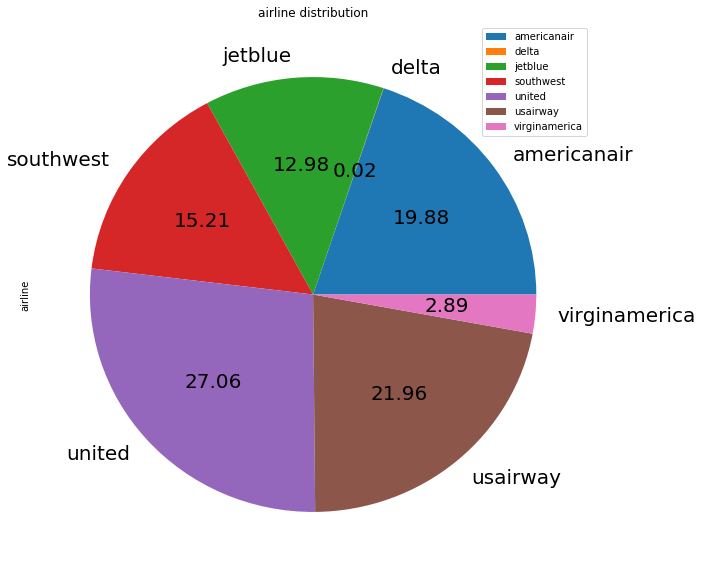

airline
americanair      2292
delta               2
jetblue          1496
southwest        1754
united           3120
usairway         2532
virginamerica     333
Name: airline, dtype: int64

In [31]:
df_airline.groupby("airline")["airline"].count().plot(kind = "pie",figsize = (10,10),fontsize = 20,autopct = "%.2f")
plt.title('airline distribution')
plt.legend(loc = 'upper right')
plt.show()
df_airline.groupby("airline")["airline"].count()

postive/negative prediction for each airline

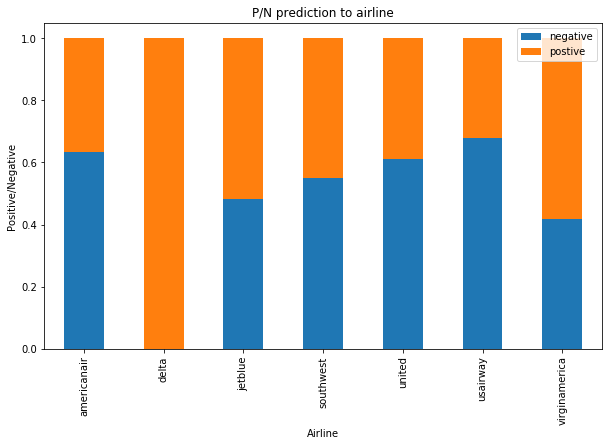

In [32]:
crosstable = pd.crosstab(df_airline.airline,df_airline.prediction)
crosstable.div(crosstable.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.title('P/N prediction to airline')
plt.legend(["negative","postive"],loc = 'upper right')
plt.xlabel('Airline')
plt.ylabel('Positive/Negative')
plt.show()

From above 2 plot we can know:
1. Delta has the highest 100% positive prediction rate, but the examples are too small to make a conclusion on entirety.
2. Virginamerica has the second highest positive rate, but also it only have 333 records. So the conclusion is relatively weak.
3. The americanair and usairway have the lowest positiion rate, so we can see the public have relatively bad views on those 2 airline.
4. For jetblue, it has enough data in data set and has a very good position rate. So we can make a conclusion that the public have a good view on jetblue.

## part 2 discussion on second model

 ### generate confusion matrix for test data of second model 
 1. compute normalized confusion matrix
 2. plot normalized confusion matrix

original confusion matrix
[[103  28   2   4   0  13   7  15   8   8]
 [ 37 200   5  27   4  14  40  14  13  12]
 [  6  15 181   6   0   6  16  12   1   7]
 [ 34 115  44 451   3  51  98  32  13  31]
 [  1   2   0   1   8   0   0   0   6   0]
 [ 14  18   0   7   2  77   2   8   7   4]
 [ 10  13  11  13   0   2 108   3   0   2]
 [ 28  35  18  18   4  23   9 314   9  35]
 [  7  17   8  14   6   4   1   8 135   6]
 [  5   2   2   2   0  11   3  11   3  21]]


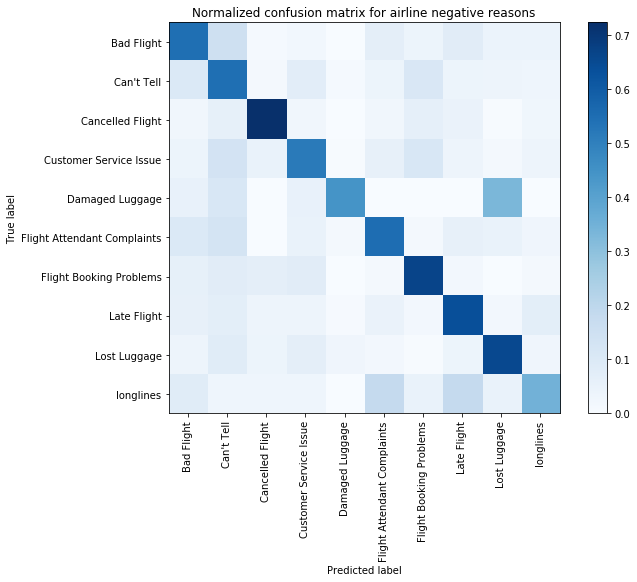

In [33]:
from sklearn.metrics import confusion_matrix

# form official Scikit learn website
def plot_confusion_matrix(cm, 
                          class_names,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    plt.figure(figsize = [10,8])
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation = 90)
    plt.yticks(tick_marks, class_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    
# 1. compute normalized confusion matrix

multi_class_prediction = multi_logistic_model.predict(test_sentences_vector)
confusion_matrix = confusion_matrix(test_label,multi_class_prediction)
cm_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
print("original confusion matrix")
print(confusion_matrix)
class_names = ["Bad Flight", "Can't Tell", "Cancelled Flight", "Customer Service Issue", "Damaged Luggage",\
                "Flight Attendant Complaints", "Flight Booking Problems", "Late Flight", "Lost Luggage", "longlines"]

# 2. plot normalized confusion matrix
plot_confusion_matrix(cm_normalized, class_names = class_names, title = 'Normalized confusion matrix for airline negative reasons')

### generate distribution for airline negative reason

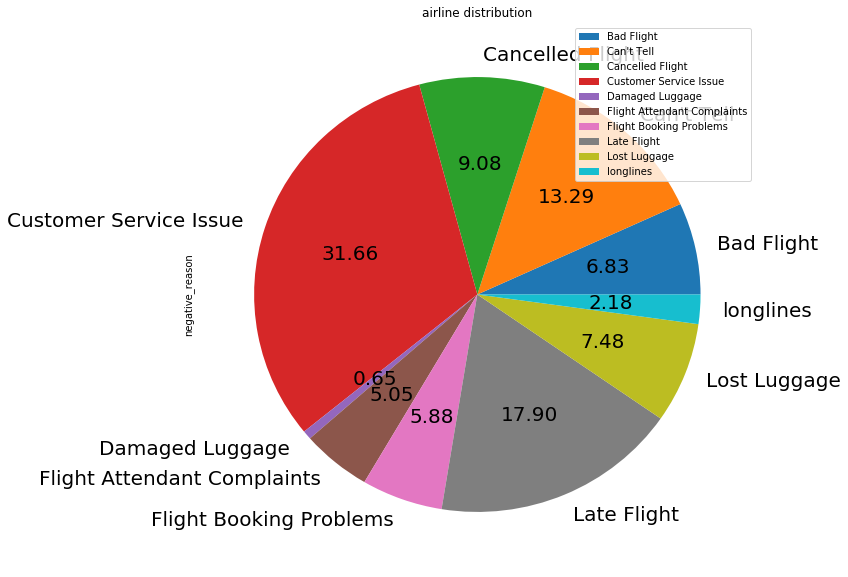

negative_reason
Bad Flight                     188
Can't Tell                     366
Cancelled Flight               250
Customer Service Issue         872
Damaged Luggage                 18
Flight Attendant Complaints    139
Flight Booking Problems        162
Late Flight                    493
Lost Luggage                   206
longlines                       60
Name: negative_reason, dtype: int64

In [34]:
df_airline_test_dataset.groupby("negative_reason")["negative_reason"].count().plot(kind = "pie",figsize = (10,10),fontsize = 20,autopct = "%.2f")
plt.title('airline distribution')
plt.legend(loc = 'upper right')
plt.show()
df_airline_test_dataset.groupby("negative_reason")["negative_reason"].count()

### discuss on why they are misclassified?

First reason, distribution plot above we can see, the negative reason data set is a very unbalence data set.That some categories like "longlines" are under trained and easy to be misclassified, which leads to high classification variance.

Second reason, from confusion matirx plot, we can see that reason "Damaged Luggage" can easily be misclassified to "Lost Luggage". So I list out some misclassified example.

In [35]:
negative_reason = {"Bad Flight":0,"Can't Tell":1 ,"Cancelled Flight":2 ,"Customer Service Issue":3 ,"Damaged Luggage":4,\
                   "Flight Attendant Complaints":5 ,"Flight Booking Problems":6, "Late Flight":7, "Lost Luggage":8, "longlines":9}
df_airline_test_dataset["reason_prediction"] = multi_class_prediction
df_Damaged_Luggage = df_airline_test_dataset.loc[df_airline_test_dataset["negative_reason"] == "Damaged Luggage"]
df_misclassified_Damaged_Luggage_and_Lost_Luggage = df_Damaged_Luggage.loc[df_Damaged_Luggage["reason_prediction"] == 8]
print("misclassified examples from Damaged Luggage to Lost Luggage:")
print(df_misclassified_Damaged_Luggage_and_Lost_Luggage["text"][:5].values)

print("\n")
df_Customer_Lost_Luggage = df_airline_test_dataset.loc[df_airline_test_dataset["negative_reason"] == "Lost Luggage"]
print("real Lost Luggage examples:")
print(df_Customer_Lost_Luggage["text"][:5].values)

misclassified examples from Damaged Luggage to Lost Luggage:
[' received luggage looked left snow arrived people refunded'
 ' kudos bag handler dtw gate pm keep bags hitting ground degree temp '
 ' broken luggage mild case food poisoning ua email '
 ' bottom ur baggage report fun jetblue  skytrax '
 ' spend hours worrying items carryon couldn carry plane lock bag']


real Lost Luggage examples:
[' won help luggage teen change dc flight usairways'
 ' understanding flights chose ' ' rest bags received help '
 ' check carry flight pbi newark plane luggage stow full costing time money amp aggravation'
 ' duh bag whereabouts unknown greeeaat']


D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


From above 2 set of examples we can see that the indicate words for reason "Damaged Luggage" are "luggage" and "bag". but is also appear frequently in "Lost Luggage". And also because of the small scale of "Damaged Luggage" category, the classificater can classify "Damaged Luggage" category correctly. And as the commone sence, we know "Damaged Luggage" and "Lost Luggage" sometimes can be confused.

Third reason, from confusion matrix we can see that negative reason "Customer Service Issue" has large classification variance. I list out some example from "Customer Service Issue" to see what happen.

In [36]:
df_Customer_Service_Issue = df_airline_test_dataset.loc[df_airline_test_dataset["negative_reason"] == "Customer Service Issue"]
print("examples of Customer Service Issue:")
print(df_Customer_Service_Issue["text"][:30].values)

examples of Customer Service Issue:
[' ruin vacation brother called night multiple places dead air call '
 ' negative wasting time amateurs customer service offering'
 ' wifi plane gotta pay help broke homegirl '
 ' suck customer service dallas trapped ice storm didn cancelled flight flight amp hold day'
 ' yall fly chicago don live send bullshit ass customer service'
 ' help agents phone twitter fb american airlines help '
 ' hoping don charged flight couldn handle influx calls bummer'
 ' better mobile app app  seemless check ' ' '
 ' guys nice routes jet blue southwest treat customers properly'
 ' help cancelled flighting flight calls times ridiculous'
 ' waiting reps mins waiting freezing weather waiting cab'
 ' agent reservations contact waste time sitting phone hours'
 ' hangs agents ground useless don seat class ticket booked weeks ago'
 ' car accident airport missed flight rno dca resched hr wait'
 ' talk actual person will help guys ' ' called reservation waiting call '
 ' phon

From above example we can see that, most of "Customer Service Issue" complain about airline hotline, but still some mentioned about tickets and cancelled flight. So the problem in this category is that the labels are not specific enough. Maybe this category can keep split into serveral sub-categories so that the classification can more accuracy.

 ### how to improve accuracy of the both model?

From my point of view, 
1. First way to improve accuracy of model is that we need to pay attention on feature selection. To be specific, in NLP, we need to get rid of noise by choose training feature carefully in order to training the model efficiently and correctly. 
2. treat the categories more carefully. some categories can be merage to one category, others can be splited into serveral categorys. Only we have a correct training example set can we get a better model.